# Week 2

## Task 1

In [129]:
import re
import numpy as np
from scipy.spatial.distance import cosine
matrix_of_words = []
dictionary_of_words = {}
distances = []
indexes = []

In [130]:
input_file = open("D:/booster_mds_files/MIPT_YANDEX_Part1/Sentences.txt","r")
sentences = input_file.read()
input_file.close()
sentences = sentences.splitlines()

In [131]:
for i in range(len(sentences)):
    sentences[i] = sentences[i].lower()
    words = re.split('[^a-z]', sentences[i])
    words = [w for w in words if w]
    matrix_of_words.append(words)
print(matrix_of_words)

[['in', 'comparison', 'to', 'dogs', 'cats', 'have', 'not', 'undergone', 'major', 'changes', 'during', 'the', 'domestication', 'process'], ['as', 'cat', 'simply', 'catenates', 'streams', 'of', 'bytes', 'it', 'can', 'be', 'also', 'used', 'to', 'concatenate', 'binary', 'files', 'where', 'it', 'will', 'just', 'concatenate', 'sequence', 'of', 'bytes'], ['a', 'common', 'interactive', 'use', 'of', 'cat', 'for', 'a', 'single', 'file', 'is', 'to', 'output', 'the', 'content', 'of', 'a', 'file', 'to', 'standard', 'output'], ['cats', 'can', 'hear', 'sounds', 'too', 'faint', 'or', 'too', 'high', 'in', 'frequency', 'for', 'human', 'ears', 'such', 'as', 'those', 'made', 'by', 'mice', 'and', 'other', 'small', 'animals'], ['in', 'one', 'people', 'deliberately', 'tamed', 'cats', 'in', 'a', 'process', 'of', 'artificial', 'selection', 'as', 'they', 'were', 'useful', 'predators', 'of', 'vermin'], ['the', 'domesticated', 'cat', 'and', 'its', 'closest', 'wild', 'ancestor', 'are', 'both', 'diploid', 'organism

In [132]:
i = 0
for words in matrix_of_words:
    for word in words:
        if (word not in dictionary_of_words):
            dictionary_of_words[word] = i
            i += 1
print(dictionary_of_words)

{'in': 0, 'comparison': 1, 'to': 2, 'dogs': 3, 'cats': 4, 'have': 5, 'not': 6, 'undergone': 7, 'major': 8, 'changes': 9, 'during': 10, 'the': 11, 'domestication': 12, 'process': 13, 'as': 14, 'cat': 15, 'simply': 16, 'catenates': 17, 'streams': 18, 'of': 19, 'bytes': 20, 'it': 21, 'can': 22, 'be': 23, 'also': 24, 'used': 25, 'concatenate': 26, 'binary': 27, 'files': 28, 'where': 29, 'will': 30, 'just': 31, 'sequence': 32, 'a': 33, 'common': 34, 'interactive': 35, 'use': 36, 'for': 37, 'single': 38, 'file': 39, 'is': 40, 'output': 41, 'content': 42, 'standard': 43, 'hear': 44, 'sounds': 45, 'too': 46, 'faint': 47, 'or': 48, 'high': 49, 'frequency': 50, 'human': 51, 'ears': 52, 'such': 53, 'those': 54, 'made': 55, 'by': 56, 'mice': 57, 'and': 58, 'other': 59, 'small': 60, 'animals': 61, 'one': 62, 'people': 63, 'deliberately': 64, 'tamed': 65, 'artificial': 66, 'selection': 67, 'they': 68, 'were': 69, 'useful': 70, 'predators': 71, 'vermin': 72, 'domesticated': 73, 'its': 74, 'closest': 

In [133]:
n = len(sentences)
d = i
matrix = np.zeros((n,d))
for ind in range(n):
    for word in matrix_of_words[ind]:
        matrix[ind,dictionary_of_words[word]] += 1
print(matrix)

[[ 1.  1.  1. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  2. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  1.  1.  1.]]


In [135]:
for i in range(n):
    distances.append(cosine(matrix[0,:], matrix[i,:]))
    
for i in range(2):
    index = distances.index(min(distances[1:]))
    indexes.append(str(index))
    distances.pop(index)

print(indexes)

['6', '4']


In [136]:
with open('D:/booster_mds_files/MIPT_YANDEX_Part1/week2_task1.txt', 'w') as output_file:
    output_file.write(' '.join(indexes))

## Task 2

In [232]:
import numpy as np
from math import sin, exp
from scipy import linalg
from matplotlib import pyplot as pyplot

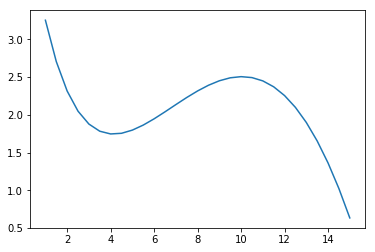

In [239]:
def f(x):
    return sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)


x = np.arange(1, 15.5, 0.5)
y = [f(x) for x in x]
pyplot.plot(x, y)

solution w1:  [ 3.43914511 -0.18692825]


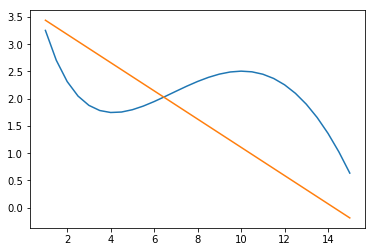

In [240]:
a1 = np.array([[1, 1], [1, 15]])
b1 = np.array([f(1), f(15)])
w1 = linalg.solve(a1, b1)
print("solution w1: ",w1)

w_x1 = [1, 15]
pyplot.plot(x, y)
pyplot.plot(w_x1, w1)

solution w2:  [ 3.32512949 -0.06531159 -0.00760104]


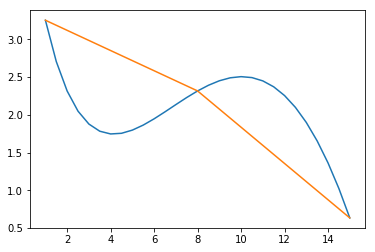

In [244]:
a2 = np.array([[1, 1, 1], [1, 8, 64], [1, 15, 225]])
b2 = np.array([f(1), f(8), f(15)])
w2 = linalg.solve(a2, b2)
print("solution w2: ",w2)

w_x2 = [[1], [8], [15]]
w_y2 = np.polynomial.polynomial.polyval(w_x2, w2, tensor=True)
pyplot.plot(x, y)
pyplot.plot(w_x2, w_y2)

solution w3:  [ 4.36264154 -1.29552587  0.19333685 -0.00823565]


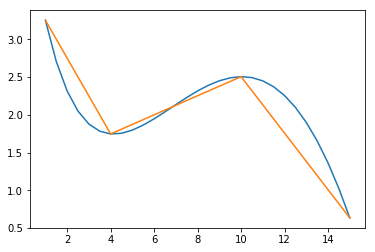

In [245]:
a3 = np.array([[1, 1, 1, 1], [1, 4, 16, 64], [1, 10, 100, 1000], [1, 15, 225, 3375]])
b3 = np.array([f(1), f(4), f(10), f(15)])
w3 = linalg.solve(a3, b3)
print("solution w3: ",w3)

w_x3 = [[1], [4], [10], [15]]
w_y3 = np.polynomial.polynomial.polyval(w_x3, w3, tensor=True)
pyplot.plot(x, y)
pyplot.plot(w_x3, w_y3)

In [246]:
w_array = []
for i in w3:
    w_array.append(str(i))

with open('D:/booster_mds_files/MIPT_YANDEX_Part1/week2_task2.txt', 'w') as output_file:
    output_file.write(' '.join(w_array))
    